In [101]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
#load the data into pandas

data = pd.read_csv("/Users/sarthaknegi/Downloads/new_york_listings_2024.csv")

In [103]:
#convert the data into pandas dataframe

df = pd.DataFrame(data)
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1
5,49584983,Rental unit in New York · ★5.0 · 1 bedroom · 1...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,...,2023-07-29,0.16,139,276,2,No License,5.0,1,1,1
6,45457047,Rental unit in New York · ★4.33 · Studio · 1 b...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.767370,-73.987870,Entire home/apt,105.0,...,2022-08-31,0.10,139,364,0,No License,4.33,Studio,1,1
7,45847112,Rental unit in New York · ★4.50 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.765190,-73.990130,Entire home/apt,130.0,...,2023-05-30,0.26,139,295,2,No License,4.50,2,2,1
8,19280212,Rental unit in Brooklyn · ★4.79 · 1 bedroom · ...,2526182,Margaux,Brooklyn,Williamsburg,40.711530,-73.953120,Private room,90.0,...,2023-10-01,0.24,2,5,2,No License,4.79,1,1,1
9,895681617796889995,Rental unit in Brooklyn · ★4.67 · 1 bedroom · ...,14251313,Kristin,Brooklyn,Sunset Park,40.658913,-73.989590,Entire home/apt,292.0,...,2023-10-19,1.71,1,365,12,No License,4.67,1,1,1


In [20]:
#check for any incorrect data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [104]:
#change the date field to datetime

df['last_review'] = pd.to_datetime(df['last_review'])

In [105]:
#check for any duplicate data in the dataframe

df.duplicated().sum()

np.int64(0)

In [230]:
#check for any incosintencies in the column names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20758 non-null  int64         
 1   name                            20758 non-null  object        
 2   host_id                         20758 non-null  int64         
 3   host_name                       20758 non-null  object        
 4   neighbourhood_group             20758 non-null  object        
 5   neighbourhood                   20758 non-null  object        
 6   latitude                        20758 non-null  float64       
 7   longitude                       20758 non-null  float64       
 8   room_type                       20758 non-null  object        
 9   price                           20758 non-null  float64       
 10  minimum_nights                  20758 non-null  int64         
 11  nu

In [107]:
#general data aggregates

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,2023-02-24 12:28:55.658541312,1.257910,18.844108,205.990317,10.852105,1.723721
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,2011-12-10 00:00:00,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,2023-04-08 00:00:00,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,2023-09-20 00:00:00,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,2023-11-25 00:00:00,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,2024-01-05 00:00:00,75.490000,713.000000,365.000000,1075.000000,42.000000
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,NaN,1.904661,70.910834,135.087768,21.357071,1.212272


In [108]:
#check number of properties per neighbourhood group

df.groupby('neighbourhood_group')['neighbourhood_group'].count().rename('prop_count').reset_index()

,neighbourhood_group,prop_count
0,Bronx,949
1,Brooklyn,7719
2,Manhattan,8038
3,Queens,3761
4,Staten Island,291


In [109]:
#top 5 most expensive neighbourhoods

df_grouped = df.groupby('neighbourhood_group')['price'].mean().rename('avg_prop_price').sort_values(ascending=False).reset_index()
df_grouped['rank'] = df_grouped['avg_prop_price'].rank(method='dense',ascending=False)
df_grouped[df_grouped['rank'] <= 5][['neighbourhood_group','avg_prop_price']]

,neighbourhood_group,avg_prop_price
0,Manhattan,227.854193
1,Brooklyn,187.033942
2,Queens,126.489232
3,Staten Island,118.780069
4,Bronx,118.407798


In [110]:
#room type distributions

df['room_type'].value_counts()

room_type
Entire home/apt    11549
Private room        8804
Shared room          293
Hotel room           112
Name: count, dtype: int64

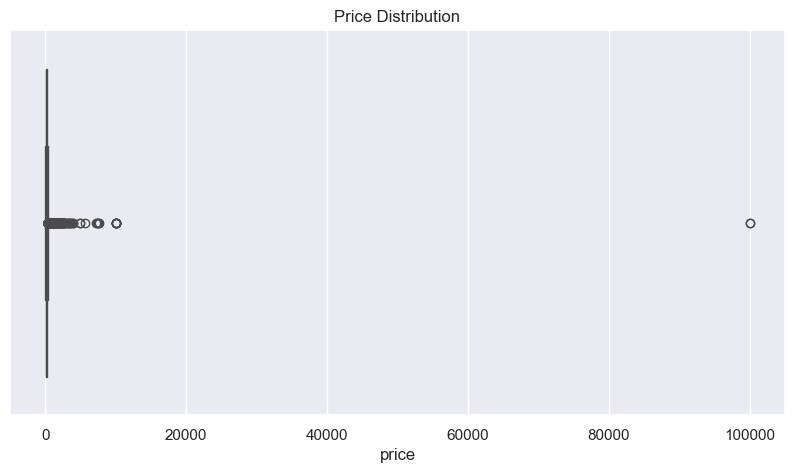

In [111]:
#identifying outliers in price

plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title("Price Distribution")
plt.show()

In [112]:
#average price per neighbourhood

df.groupby('neighbourhood_group')['price'].agg(['mean','median'])

,mean,median
neighbourhood_group,,
Bronx,118.407798,89.0
Brooklyn,187.033942,125.0
Manhattan,227.854193,150.0
Queens,126.489232,98.0
Staten Island,118.780069,99.0


In [117]:
#Availability statistics

availability = df[df['availability_365'] > 0]['availability_365']
print(f"Mean: {np.mean(availability)}, Median: {np.median(availability)}")

Mean: 233.96514554607134, Median: 259.0


In [133]:
#find 5 most reviewed listing

df.nlargest(5,'number_of_reviews')[['name', 'host_name', 'number_of_reviews']]

,name,host_name,number_of_reviews
2384,Boutique hotel in New York · ★4.54 · 1 bedroom...,The Ridge,1865
8342,Hotel in New York · ★4.66 · 1 bedroom · 1 bed ...,M,1618
6409,Hotel in New York · ★4.42 · 1 bedroom · 1 bed ...,Millennium Downtown,1574
8340,Hotel in New York · ★4.65 · 1 bedroom · 2 beds...,M,1201
12790,Hotel in New York · ★4.36 · 1 bedroom · 1 bed ...,Millennium Broadway,1188


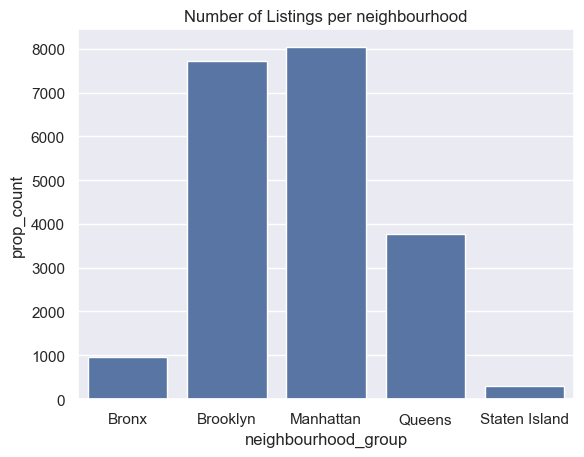

In [200]:
#number of listings per neighbourhood

df_chart = df.groupby('neighbourhood_group')['neighbourhood_group'].count().rename('prop_count').reset_index()
sns.barplot(x=df_chart['neighbourhood_group'],y=df_chart['prop_count'], data=df_chart)
plt.title("Number of Listings per neighbourhood")
plt.show()

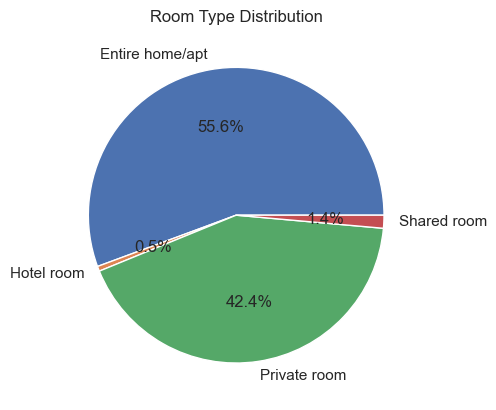

In [204]:
#room type distribution

df_piechart = df.groupby('room_type').size().reset_index(name='count')

lab = df_piechart['room_type']
values = df_piechart['count']


plt.pie(values, labels=lab, autopct='%1.1f%%')
plt.title("Room Type Distribution")
plt.show()

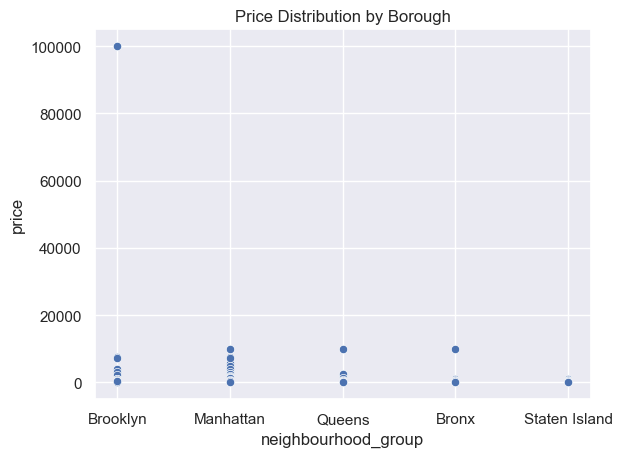

In [205]:
#price distribution across neighbourhoods

sns.scatterplot(x='neighbourhood_group', y='price', data=df)
plt.title("Price Distribution by Borough")
plt.show()

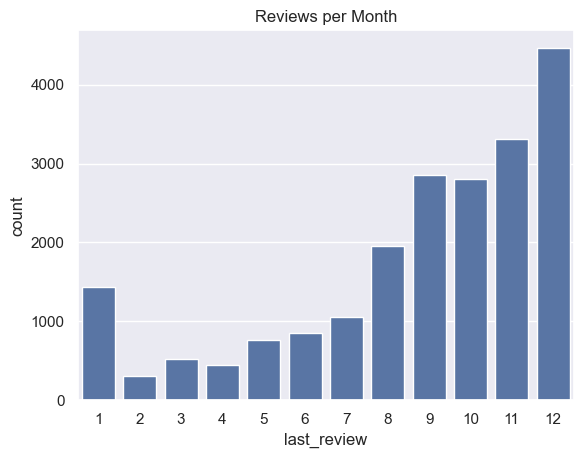

In [216]:
df_bar = df.groupby(df['last_review'].dt.month).size().reset_index(name="count")
sns.barplot(x=df_bar['last_review'],y=df_bar['count'],data = df_bar)
plt.title("Reviews per Month")
plt.show()

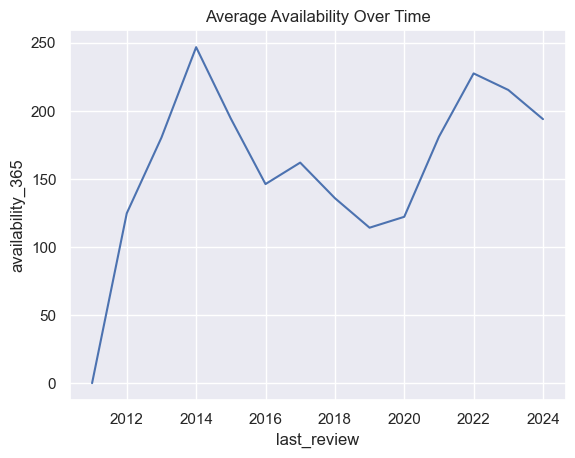

In [227]:
df_line = df.groupby(df['last_review'].dt.year)['availability_365'].mean().reset_index()
sns.lineplot(x=df_line['last_review'],y=df_line['availability_365'])
plt.title("Average Availability Over Time")
plt.show()

In [232]:
#load data into Mysql for further analysis

import pandas as pd
import sqlalchemy as sal

USER = 'root'
PASSWORD = 'Hellosql123#'
HOST = 'Sarthaks-MacBook-Air.local'
DATABASE = 'Practice'

engine = sal.create_engine(f'mysql+pymysql://{USER}:{PASSWORD}@{HOST}/{DATABASE}')

df.to_sql('airbnb_listings', con=engine, if_exists='append', index=False)

20758